<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_3_2)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/multiplication_pattern/multiplication_delta_-3.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-3.2_n20.csv',
 'data_multi_delta_-3.2_n30.csv',
 'data_multi_delta_-3.2_n60.csv',
 'data_multi_delta_-3.2_n120.csv',
 'data_multi_delta_-3.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.2_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,32.090180,63.481865,44.494017,-8.724916e-07,150.066061,150.066065,-0.000003
1,0.0,1.0,22.918788,33.108915,52.423665,-1.757381e-05,118.451351,118.451372,-0.000022
2,0.0,2.0,94.260387,56.081862,24.905140,1.462696e-06,185.247390,185.247386,0.000004
3,0.0,3.0,65.636759,40.752420,51.472793,5.378852e-06,167.861977,167.861972,0.000005
4,0.0,4.0,97.137857,54.229049,63.847257,6.697121e-07,225.214164,225.214161,0.000003
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,49.646676,50.978722,26.318548,-4.437095e-07,136.943945,136.943947,-0.000002
249996,999.0,246.0,78.779314,34.012604,87.946333,1.204418e-05,210.738263,210.738254,0.000009
249997,999.0,247.0,61.652474,82.101807,97.484738,1.770893e-07,251.239019,251.239018,0.000001
249998,999.0,248.0,46.761180,26.524864,30.500874,4.220050e-05,113.786960,113.786920,0.000040


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,32.090180,63.481865,44.494017,-8.724916e-07,150.066061,150.066065,-0.000003
1,0.0,1.0,22.918788,33.108915,52.423665,-1.757381e-05,118.451351,118.451372,-0.000022
2,0.0,2.0,94.260387,56.081862,24.905140,1.462696e-06,185.247390,185.247386,0.000004
3,0.0,3.0,65.636759,40.752420,51.472793,5.378852e-06,167.861977,167.861972,0.000005
4,0.0,4.0,97.137857,54.229049,63.847257,6.697121e-07,225.214164,225.214161,0.000003
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,49.646676,50.978722,26.318548,-4.437095e-07,136.943945,136.943947,-0.000002
249996,999.0,246.0,78.779314,34.012604,87.946333,1.204418e-05,210.738263,210.738254,0.000009
249997,999.0,247.0,61.652474,82.101807,97.484738,1.770893e-07,251.239019,251.239018,0.000001
249998,999.0,248.0,46.761180,26.524864,30.500874,4.220050e-05,113.786960,113.786920,0.000040


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    32.090180  63.481865  44.494017  ...  150.066061  150.066065 -0.000003
      1.0    22.918788  33.108915  52.423665  ...  118.451351  118.451372 -0.000022
      2.0    94.260387  56.081862  24.905140  ...  185.247390  185.247386  0.000004
      3.0    65.636759  40.752420  51.472793  ...  167.861977  167.861972  0.000005
      4.0    97.137857  54.229049  63.847257  ...  225.214164  225.214161  0.000003
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  49.646676  50.978722  26.318548  ...  136.943945  136.943947 -0.000002
      246.0  78.779314  34.012604  87.946333  ...  210.738263  210.738254  0.000009
      247.0  61.652474  82.101807  97.484738  ...  251.239019  251.239018  0.000001
      248.0  46.761180  26.524864  30.500874  ...  113.786960  113.786920  0.000040
      249.0  60.073753  40.128998  84.335672  ...  194.538426  194.538424  0.000003

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    32.090180  63.481865  44.494017  ...  150.066061  150.066065 -0.000003
      1.0    22.918788  33.108915  52.423665  ...  118.451351  118.451372 -0.000022
      2.0    94.260387  56.081862  24.905140  ...  185.247390  185.247386  0.000004
      3.0    65.636759  40.752420  51.472793  ...  167.861977  167.861972  0.000005
      4.0    97.137857  54.229049  63.847257  ...  225.214164  225.214161  0.000003
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  49.646676  50.978722  26.318548  ...  136.943945  136.943947 -0.000002
      246.0  78.779314  34.012604  87.946333  ...  210.738263  210.738254  0.000009
      247.0  61.652474  82.101807  97.484738  ...  251.239019  251.239018  0.000001
      248.0  46.761180  26.524864  30.500874  ...  113.786960  113.786920  0.000040
      249.0  60.073753  40.128998  84.335672  ...  194.538426  194.538424  0.000003

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,32.090180,63.481865,44.494017,-8.724916e-07,150.066061,150.066065,-0.000003
1,0.0,1.0,22.918788,33.108915,52.423665,-1.757381e-05,118.451351,118.451372,-0.000022
2,0.0,2.0,94.260387,56.081862,24.905140,1.462696e-06,185.247390,185.247386,0.000004
3,0.0,3.0,65.636759,40.752420,51.472793,5.378852e-06,167.861977,167.861972,0.000005
4,0.0,4.0,97.137857,54.229049,63.847257,6.697121e-07,225.214164,225.214161,0.000003
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,49.646676,50.978722,26.318548,-4.437095e-07,136.943945,136.943947,-0.000002
249996,999.0,246.0,78.779314,34.012604,87.946333,1.204418e-05,210.738263,210.738254,0.000009
249997,999.0,247.0,61.652474,82.101807,97.484738,1.770893e-07,251.239019,251.239018,0.000001
249998,999.0,248.0,46.761180,26.524864,30.500874,4.220050e-05,113.786960,113.786920,0.000040


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    32.090180  63.481865  44.494017  ...  150.066061  150.066065 -0.000003
      1.0    22.918788  33.108915  52.423665  ...  118.451351  118.451372 -0.000022
      2.0    94.260387  56.081862  24.905140  ...  185.247390  185.247386  0.000004
      3.0    65.636759  40.752420  51.472793  ...  167.861977  167.861972  0.000005
      4.0    97.137857  54.229049  63.847257  ...  225.214164  225.214161  0.000003
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  49.646676  50.978722  26.318548  ...  136.943945  136.943947 -0.000002
      246.0  78.779314  34.012604  87.946333  ...  210.738263  210.738254  0.000009
      247.0  61.652474  82.101807  97.484738  ...  251.239019  251.239018  0.000001
      248.0  46.761180  26.524864  30.500874  ...  113.786960  113.786920  0.000040
      249.0  60.073753  40.128998  84.335672  ...  194.538426  194.538424  0.000003

[250000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]

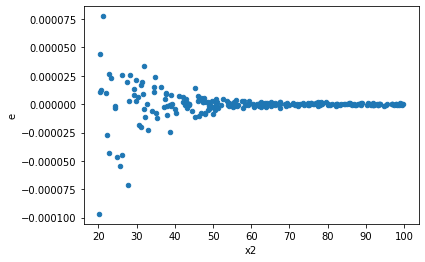

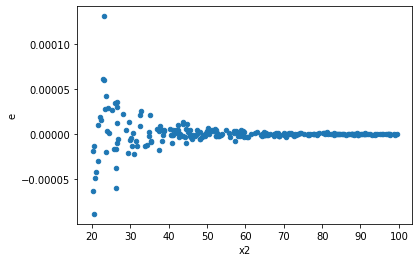

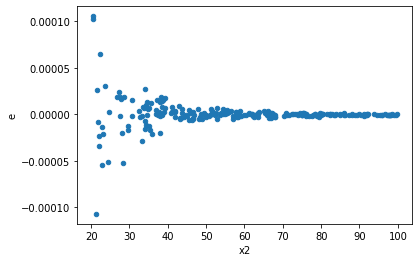

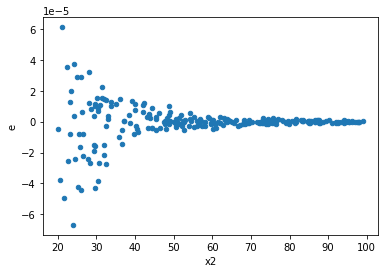

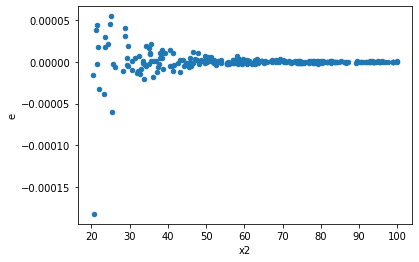

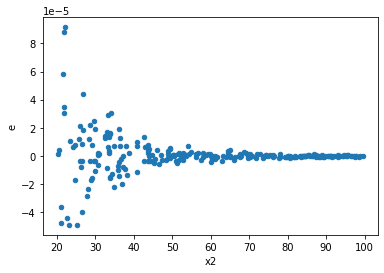

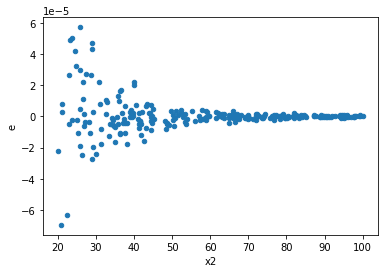

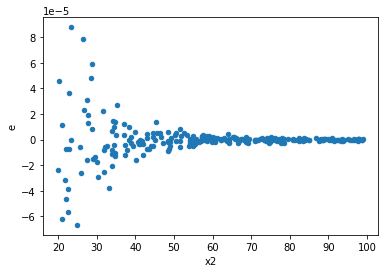

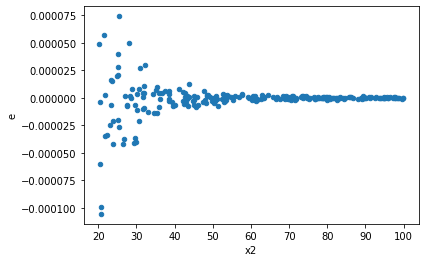

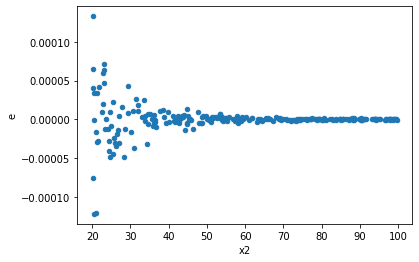

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,3.060559734089383e-11,3.789130778737855e-08,3.1880830563431076e-13,3.947011227851932e-10,0.000807720797409068,1.191764548116181e-122,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,5.680157350099114e-11,6.996278152717454e-08,5.91683057301991e-13,7.287789742414015e-10,0.0008118827219430748,1.5285246745935936e-122,Reject005=0 : Heteroscedasticity
2.0,97.0,97.0,8.09354585700545e-11,3.7046721921537126e-08,8.430776934380677e-13,3.8590335334934505e-10,0.0021846861037117197,9.498157963812544e-102,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,6.177147533274121e-11,1.0560186843591213e-07,6.434528680493876e-13,1.1000194628740847e-09,0.0005849468030031041,1.942458339309164e-129,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,4.9621600423994835e-11,5.063687654538011e-08,5.168916710832795e-13,5.274674640143762e-10,0.0009799498667640884,1.3813503412178066e-118,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,9.381638310253703e-11,3.605569617410857e-08,9.772539906514275e-13,3.755801684802976e-10,0.0026019850691416167,4.389056048294108e-98,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,5.6250972960723034e-11,4.411167959331575e-08,5.859476350075316e-13,4.5949666243037237e-10,0.0012751945398435192,4.733712551168043e-113,Reject005=0 : Heteroscedasticity
7.0,97.0,97.0,6.117481090954958e-11,6.923772321263223e-08,6.372376136411415e-13,7.21226283464919e-10,0.0008835474084218357,9.184173646909596e-121,Reject005=0 : Heteroscedasticity
8.0,97.0,97.0,5.277370554668029e-11,3.571352571224835e-08,5.497260994445864e-13,3.720158928359203e-10,0.001477695200745217,5.905593619895571e-110,Reject005=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64